# Import 

# PEP 8

In [1]:
#%load_ext pycodestyle_magic
#%pycodestyle_on

## Librairies

In [2]:
%pylab inline
import pandas as pd
import os
import seaborn as sns
import plotly.express as px
sns.set_context("talk")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Données

In [3]:
cdir = 'datasets/'
# files = os.listdir('P5')

customers = pd.read_csv(cdir + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(cdir + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(cdir + 'olist_order_items_dataset.csv')
order_payements = pd.read_csv(cdir + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(cdir + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(cdir + 'olist_orders_dataset.csv')
products = pd.read_csv(cdir + 'olist_products_dataset.csv')
sellers = pd.read_csv(cdir + 'olist_sellers_dataset.csv')
cat_name = pd.read_csv(cdir + 'product_category_name_translation.csv')

In [4]:
temp1 = pd.merge(customers, orders, on='customer_id')
temp2 = pd.merge(temp1, order_items, on='order_id')
temp3 = pd.merge(temp2, order_payements, on='order_id')
temp4 = pd.merge(temp3, order_reviews, on='order_id')
temp5 = pd.merge(temp4, products, on='product_id')
temp6 = pd.merge(temp5, sellers, on='seller_id')
temp7 = pd.merge(temp6, cat_name, on='product_category_name')
geolocation = geolocation.groupby(['geolocation_zip_code_prefix', 'geolocation_state'])[['geolocation_lat','geolocation_lng']].mean().reset_index()
df = pd.merge(temp7, geolocation, left_on='customer_zip_code_prefix', 
              right_on='geolocation_zip_code_prefix')

# Exploration and cleaning

In [5]:
# Affichage complet du dataset

pd.pandas.set_option('display.max_columns', None)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_zip_code_prefix,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,14409,SP,-20.498489,-47.396929
1,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12 00:00:00,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79,1,credit_card,3,32.69,e0fd752f37c8c6866ceb53b79b0715f6,5,NaN,NaN,2018-03-29 00:00:00,2018-04-11 20:07:14,automotivo,46.0,708.0,1.0,567.0,19.0,14.0,15.0,4243,sao paulo,SP,auto,14409,SP,-20.498489,-47.396929
2,e2742ef931c3e60509e74345605c5370,9a481c845f8bf3fb0b9f4520f11c353e,14409,franca,SP,c23e9a555c327fa1d60893394aae9e9e,delivered,2018-03-26 17:29:38,2018-03-26 17:47:34,2018-03-27 18:29:45,2018-04-03 22:48:58,2018-05-07 00:00:00,1,91846781ef75057e134949400768e272,530ec6109d11eaaf87999465c6afee01,2018-03-30 17:47:34,149.90,23.63,1,credit_card,2,173.53,05bf30d315c3cd05bdd6d2c5fe6715ab,4,NaN,NaN,2018-04-04 00:00:00,2018-04-05 04:04:45,esporte_lazer,59.0,1732.0,5.0,1550.0,40.0,20.0,20.0,85807,cascavel,PR,sports_leisure,14409,SP,-20.498489,-47.396929
3,58dbe9ebb990e72ca35a2f223ea1a60c,7d38334a3ee44842f9e975440db1029f,14409,franca,SP,8afe2929db4833bd7bc32d18fe3bf502,delivered,2017-06-13 21:56:02,2017-06-13 22:15:13,2017-06-14 15:58:41,2017-06-19 15:28:00,2017-07-04 00:00:00,1,d370e908175e2f3b39bb7fd33fd4c530,751bdc4d83a466c7206cd42e8f426b03,2017-06-19 22:15:13,19.99,12.69,2,credit_card,1,6.58,0366ed9f200480f45d3108999d0763ac,5,NaN,NaN,2017-06-20 00:00:00,2017-06-23 20:19:43,esporte_lazer,60.0,972.0,1.0,400.0,20.0,20.0,20.0,9405,ribeirao pires,SP,sports_leisure,14409,SP,-20.498489,-47.396929
4,58dbe9ebb990e72ca35a2f223ea1a60c,7d38334a3ee44842f9e975440db1029f,14409,franca,SP,8afe2929db4833bd7bc32d18fe3bf502,delivered,2017-06-13 21:56:02,2017-06-13 22:15:13,2017-06-14 15:58:41,2017-06-19 15:28:00,2017-07-04 00:00:00,1,d370e908175e2f3b39bb7fd33fd4c530,751bdc4d83a466c7206cd42e8f426b03,2017-06-19 22:15:13,19.99,12.69,1,credit_card,2,26.10,0366ed9f200480f45d3108999d0763ac,5,NaN,NaN,2017-06-20 00:00:00,2017-06-23 20:19:43,esporte_lazer,60.0,972.0,1.0,400.0,20.0,20.0,20.0,9405,ribeirao pires,SP,sports_leisure,14409,SP,-20.498489,-47.396929


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115394 entries, 0 to 115393
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115394 non-null  object 
 1   customer_unique_id             115394 non-null  object 
 2   customer_zip_code_prefix       115394 non-null  int64  
 3   customer_city                  115394 non-null  object 
 4   customer_state                 115394 non-null  object 
 5   order_id                       115394 non-null  object 
 6   order_status                   115394 non-null  object 
 7   order_purchase_timestamp       115394 non-null  object 
 8   order_approved_at              115380 non-null  object 
 9   order_delivered_carrier_date   114205 non-null  object 
 10  order_delivered_customer_date  113006 non-null  object 
 11  order_estimated_delivery_date  115394 non-null  object 
 12  order_item_id                 

In [7]:
df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,115394.000000,115394.000000,115394.000000,115394.000000,115394.000000,115394.000000,115394.000000,115394.000000,115394.000000,115394.00000,115394.000000,115393.000000,115393.000000,115393.000000,115393.000000,115394.000000,115394.000000,115394.000000,115394.000000
mean,34988.644418,1.195062,120.589992,20.051940,1.093844,2.946392,172.511397,4.034040,48.765074,785.89671,2.205089,2116.175964,30.316362,16.643809,23.118118,24529.260282,34988.644418,-21.235392,-46.197727
std,29832.322815,0.687948,182.633597,15.843414,0.730474,2.781622,266.558536,1.385934,10.037791,652.55504,1.717448,3785.873364,16.215195,13.477582,11.756156,27649.867993,29832.322815,5.562619,4.043576
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.00000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1003.000000,-33.689948,-72.668881
25%,11095.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.860000,4.000000,42.000000,346.00000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,11095.000000,-23.590181,-48.104959
50%,24230.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.085000,5.000000,52.000000,600.00000,1.000000,700.000000,25.000000,13.000000,20.000000,13690.000000,24230.000000,-22.928999,-46.631968
75%,58318.750000,1.000000,134.900000,21.200000,1.000000,4.000000,189.420000,5.000000,57.000000,983.00000,3.000000,1800.000000,38.000000,20.000000,30.000000,28615.000000,58318.750000,-20.188080,-43.622642
max,99980.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.00000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,99980.000000,42.184003,-8.723762


In [8]:
# Nombre d'occurences des variables liées aux paiements

payment_var = ['payment_sequential', 'payment_type', 'payment_installments']

for var in payment_var:
    print(var)
    print(df[var].value_counts()/len(df))
    print('\n')

payment_sequential
1     0.957207
2     0.028502
3     0.005512
4     0.002660
5     0.001586
6     0.001101
7     0.000763
8     0.000503
9     0.000407
10    0.000347
11    0.000303
12    0.000234
13    0.000130
14    0.000113
15    0.000095
18    0.000078
19    0.000078
16    0.000078
17    0.000078
21    0.000052
20    0.000052
22    0.000026
25    0.000017
26    0.000017
23    0.000017
24    0.000017
27    0.000009
29    0.000009
28    0.000009
Name: payment_sequential, dtype: float64


payment_type
credit_card    0.737595
boleto         0.194733
voucher        0.053296
debit_card     0.014377
Name: payment_type, dtype: float64


payment_installments
1     0.498249
2     0.115916
3     0.099936
4     0.067958
10    0.058747
5     0.051242
8     0.043338
6     0.039300
7     0.015443
9     0.006153
12    0.001421
15    0.000789
18    0.000329
24    0.000295
11    0.000191
20    0.000173
13    0.000165
14    0.000139
17    0.000061
16    0.000061
21    0.000052
0     0.000026
22    

## customer_id vs customer_unique_id

In [9]:
len(df['customer_id'].unique())

96249

In [10]:
len(df['customer_unique_id'].unique())

93139

# Features

## Creation

### Delivery time

In [11]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['delivery_time'] = df['delivery_time'].dt.days

### Distance seller/buyer

In [12]:
# Est-ce que le client et l'acheteur sont dans le même état

df['same_state'] = df['geolocation_state'] == df['seller_state']

### Volume

In [13]:
df['volume'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

## Subset selection

In [14]:
sel = df[['customer_unique_id', 'customer_city', 'customer_state', 'order_id',
          'order_purchase_timestamp', 'order_status','product_id', 'seller_id', 'price',
          'freight_value', 'review_score', 'product_category_name_english',
          'geolocation_lat', 'geolocation_lng',  'payment_type', 'payment_installments',
          'volume', 'product_weight_g', 'delivery_time', 'same_state']]

In [15]:
sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115394 entries, 0 to 115393
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             115394 non-null  object        
 1   customer_city                  115394 non-null  object        
 2   customer_state                 115394 non-null  object        
 3   order_id                       115394 non-null  object        
 4   order_purchase_timestamp       115394 non-null  datetime64[ns]
 5   order_status                   115394 non-null  object        
 6   product_id                     115394 non-null  object        
 7   seller_id                      115394 non-null  object        
 8   price                          115394 non-null  float64       
 9   freight_value                  115394 non-null  float64       
 10  review_score                   115394 non-null  int64         
 11  

In [16]:
sel.head()

,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_status,product_id,seller_id,price,freight_value,review_score,product_category_name_english,geolocation_lat,geolocation_lng,payment_type,payment_installments,volume,product_weight_g,delivery_time,same_state
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,delivered,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,4,office_furniture,-20.498489,-47.396929,credit_card,2,107136.0,8683.0,8.0,True
1,8b3d988f330c1d1c3332ccd440c147b7,franca,SP,dceb8e88274c6f42a88a76ed979eb817,2018-03-26 12:04:55,delivered,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,19.90,12.79,5,auto,-20.498489,-47.396929,credit_card,3,3990.0,567.0,2.0,True
2,9a481c845f8bf3fb0b9f4520f11c353e,franca,SP,c23e9a555c327fa1d60893394aae9e9e,2018-03-26 17:29:38,delivered,91846781ef75057e134949400768e272,530ec6109d11eaaf87999465c6afee01,149.90,23.63,4,sports_leisure,-20.498489,-47.396929,credit_card,2,16000.0,1550.0,8.0,False
3,7d38334a3ee44842f9e975440db1029f,franca,SP,8afe2929db4833bd7bc32d18fe3bf502,2017-06-13 21:56:02,delivered,d370e908175e2f3b39bb7fd33fd4c530,751bdc4d83a466c7206cd42e8f426b03,19.99,12.69,5,sports_leisure,-20.498489,-47.396929,credit_card,1,8000.0,400.0,5.0,True
4,7d38334a3ee44842f9e975440db1029f,franca,SP,8afe2929db4833bd7bc32d18fe3bf502,2017-06-13 21:56:02,delivered,d370e908175e2f3b39bb7fd33fd4c530,751bdc4d83a466c7206cd42e8f426b03,19.99,12.69,5,sports_leisure,-20.498489,-47.396929,credit_card,2,8000.0,400.0,5.0,True


In [17]:
sel.describe()

,price,freight_value,review_score,geolocation_lat,geolocation_lng,payment_installments,volume,product_weight_g,delivery_time
count,115394.000000,115394.000000,115394.000000,115394.000000,115394.000000,115394.000000,115393.000000,115393.000000,113006.000000
mean,120.589992,20.051940,4.034040,-21.235392,-46.197727,2.946392,15412.869377,2116.175964,11.967949
std,182.633597,15.843414,1.385934,5.562619,4.043576,2.781622,23646.206402,3785.873364,9.357570
min,0.850000,0.000000,1.000000,-33.689948,-72.668881,0.000000,168.000000,0.000000,0.000000
25%,39.900000,13.080000,4.000000,-23.590181,-48.104959,1.000000,2873.000000,300.000000,6.000000
50%,74.900000,16.320000,5.000000,-22.928999,-46.631968,2.000000,6656.000000,700.000000,10.000000
75%,134.900000,21.200000,5.000000,-20.188080,-43.622642,4.000000,18576.000000,1800.000000,15.000000
max,6735.000000,409.680000,5.000000,42.184003,-8.723762,24.000000,296208.000000,40425.000000,208.000000


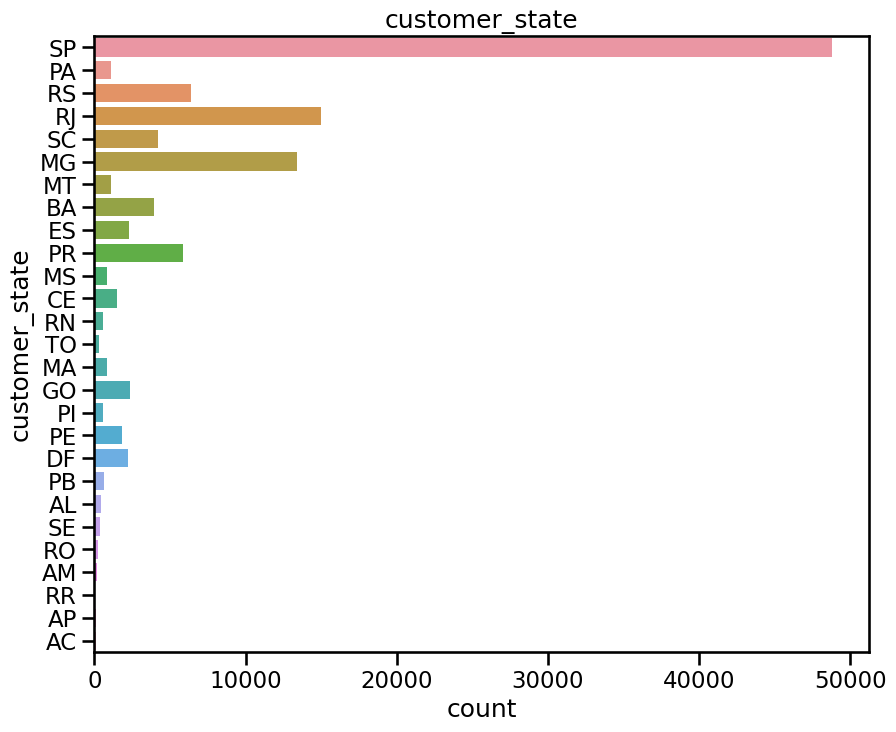

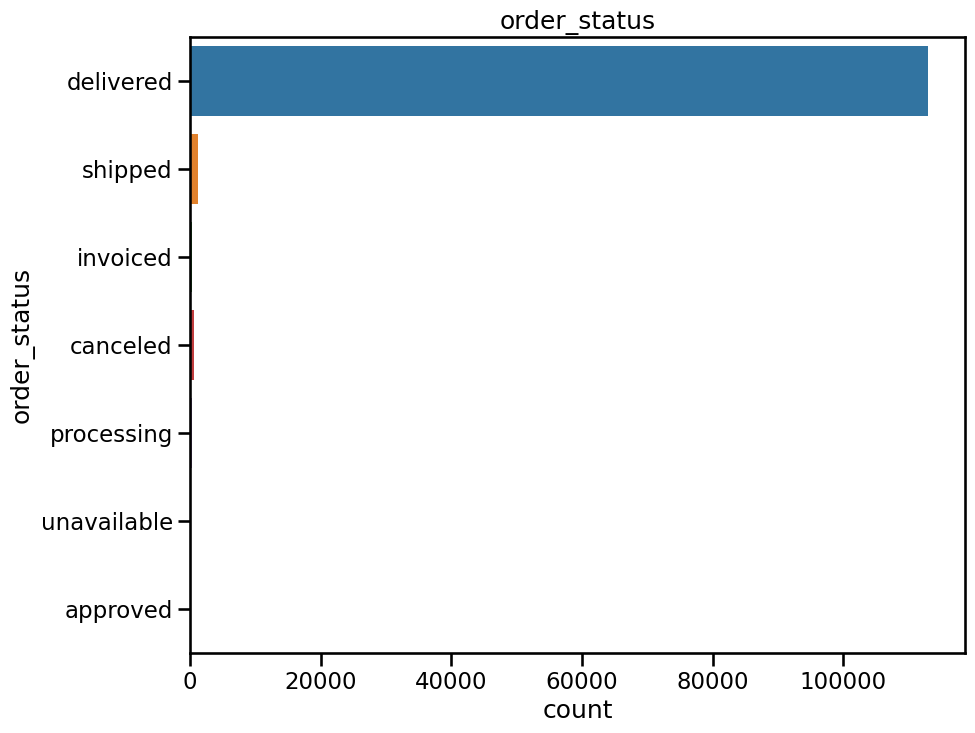

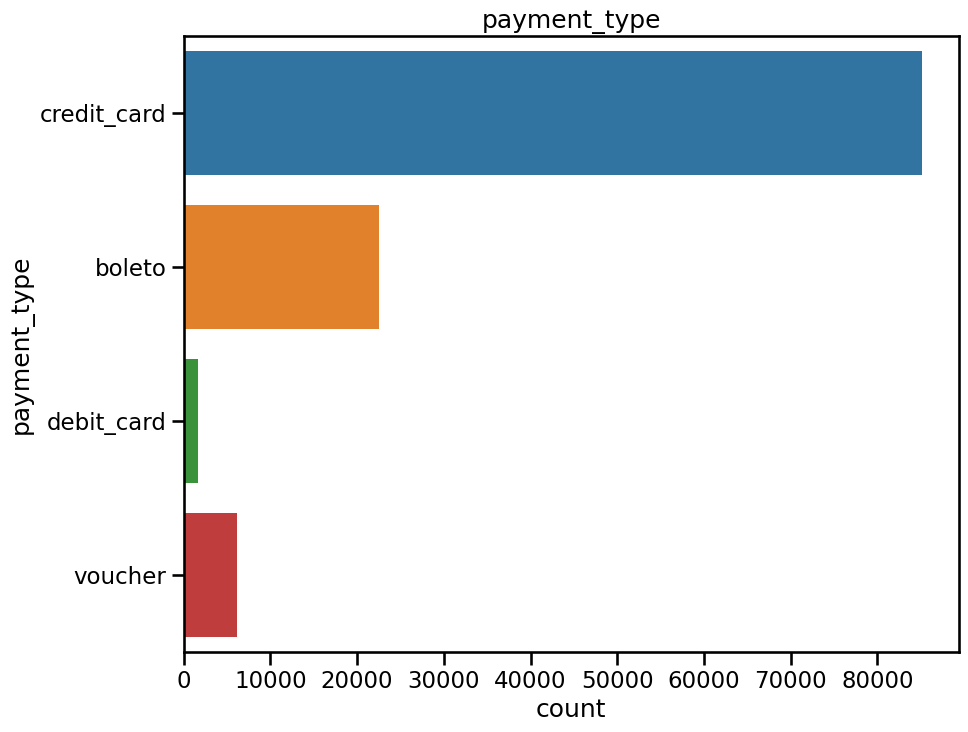

In [18]:
# Exploration de quelques variables catégorielles

cat_sel = list(sel.select_dtypes(['object']).columns)

cat_sel.remove('customer_unique_id')
cat_sel.remove('order_id')
cat_sel.remove('product_id')
cat_sel.remove('seller_id')
cat_sel.remove('customer_city')
cat_sel.remove('product_category_name_english')

for cat in cat_sel:
    fig, ax = plt.subplots(figsize=(10,8))
    sns.countplot(data=sel, y=cat)
    plt.title('{}'.format(cat))
    plt.show()

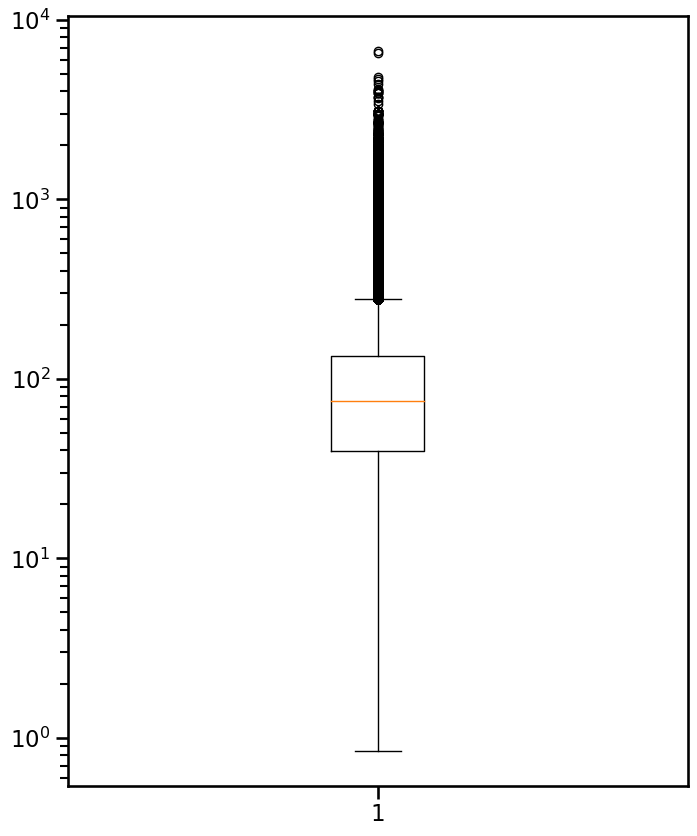

In [19]:
# boxplot des prix

fig, ax = plt.subplots(figsize=(8,10))
plt.boxplot(sel['price'])
plt.yscale('log')
plt.show()

# RFM

## Basket AVG

In [20]:
# Prix moyen de la commande (commande unique)

sum_order_by_cust = sel.groupby(['customer_unique_id', 'order_id'])['price'].sum()

In [21]:
basket_avg = sum_order_by_cust.groupby(['customer_unique_id']).mean()

## Most recent buy

In [22]:
sel.order_purchase_timestamp.dt.year.value_counts()

2018    62595
2017    52418
2016      381
Name: order_purchase_timestamp, dtype: int64

In [23]:
# Transformation en datetime

sel.loc[:,'order_purchase_timestamp'] = pd.to_datetime(sel['order_purchase_timestamp'])

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_2369/3983970698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel.loc[:,'order_purchase_timestamp'] = pd.to_datetime(sel['order_purchase_timestamp'])
/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_2369/3983970698.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sel.loc[:,'order_purchase_timestamp'] = pd.to_datetime(sel['order_purchase_timestamp'])


In [24]:
most_recent = sel.groupby('customer_unique_id')['order_purchase_timestamp'].max()

## Total amount by client

In [25]:
total_amount = sel.groupby('customer_unique_id')['price'].sum()

## Frequency

In [26]:
# méthode 1
no_duplicate = sel.drop_duplicates('order_id')
frequency = no_duplicate.groupby('customer_unique_id')['order_id'].count()
frequency.value_counts()

1     90341
2      2573
3       178
4        30
5         9
6         3
7         3
9         1
15        1
Name: order_id, dtype: int64

In [27]:
# Méthode 2 
frequency = sel.groupby('customer_unique_id')['order_id'].nunique()
frequency.value_counts()

1     90341
2      2573
3       178
4        30
5         9
6         3
7         3
9         1
15        1
Name: order_id, dtype: int64

In [28]:
frequency.value_counts() / len(frequency)

1     0.969959
2     0.027625
3     0.001911
4     0.000322
5     0.000097
6     0.000032
7     0.000032
9     0.000011
15    0.000011
Name: order_id, dtype: float64

## Review average

In [29]:
review_avg = sel.groupby('customer_unique_id')['review_score'].mean()
review_avg

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    5.0
0000b849f77a49e4a4ce2b2a4ca5be3f    4.0
0000f46a3911fa3c0805444483337064    3.0
0000f6ccb0745a6a4b88665a16c9f078    4.0
0004aac84e0df4da2b147fca70cf8255    5.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    5.0
fffea47cd6d3cc0a88bd621562a9d061    4.0
ffff371b4d645b6ecea244b27531430a    5.0
ffff5962728ec6157033ef9805bacc48    5.0
ffffd2657e2aad2907e67c3e9daecbeb    5.0
Name: review_score, Length: 93139, dtype: float64

# Category

In [30]:
# Exploration
temp = sel.set_index('customer_unique_id')

sel['product_category_name_english'].unique()

array(['office_furniture', 'auto', 'sports_leisure', 'baby', 'housewares',
       'bed_bath_table', 'toys', 'watches_gifts', 'health_beauty',
       'telephony', 'fashion_bags_accessories', 'home_appliances',
       'stationery', 'cool_stuff', 'garden_tools', 'furniture_decor',
       'construction_tools_construction', 'perfumery',
       'books_general_interest', 'furniture_living_room',
       'computers_accessories', 'electronics', 'pet_shop',
       'fashion_shoes', 'christmas_supplies', 'computers',
       'small_appliances', 'consoles_games',
       'kitchen_dining_laundry_garden_furniture', 'home_confort',
       'fixed_telephony', 'audio', 'fashion_male_clothing',
       'industry_commerce_and_business', 'music', 'cine_photo', 'food',
       'home_appliances_2', 'market_place', 'books_technical', 'drinks',
       'art', 'luggage_accessories', 'musical_instruments',
       'home_construction', 'flowers', 'food_drink', 'books_imported',
       'costruction_tools_garden', 'fashion

In [31]:
# Exploration

len(sel['product_category_name_english'].unique())

71

In [32]:
# Mappage des nouvelles catégories

technology = ['telephony', 'computers_accessories', 'electronics', 'computers', 'consoles_games',
                'fixed_telephony', 'dvds_blu_ray', 'tablets_printing_image', 'cine_photo']
audio_music = ['audio', 'music', 'musical_instruments', 'cds_dvds_musicals']
food = ['food', 'drinks', 'food_drink', 'la_cuisine']
fashion = ['fashion_childrens_clothes', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_male_clothing',
           'fashion_sport', 'fashio_female_clothing', 'fashion_underwear_beach']
office = ['office_furniture', 'stationery', 'furniture_decor']
home = ['housewares', 'bed_bath_table', 'furniture_living_room', 
        'kitchen_dining_laundry_garden_furniture', 'home_confort', 'furniture_bedroom', 'furniture_mattress_and_upholstery',
       'home_comfort_2']
auto = ['auto']
sport = ['sports_leisure']
children = ['baby', 'toys', 'fashion_childrens_clothes']
misc = ['cool_stuff', 'market_place']
garden = ['garden_tools', 'flowers', 'costruction_tools_garden']
construction = ['construction_tools_construction', 'home_construction', 'construction_tools_safety',
               'costruction_tools_tools', 'construction_tools_lights']
beauty_health = ['health_beauty', 'perfumery', 'diapers_and_hygiene']
gift = ['watches_gifts']
book = ['books_general_interest', 'books_technical', 'books_imported']
pet = ['pet_shop']
appliance = ['home_appliances', 'home_appliances_2', 'air_conditioning', 'small_appliances_home_oven_and_coffee',
            'small_appliances']
business = ['industry_commerce_and_business', 'agro_industry_and_commerce']
art = ['art', 'arts_and_craftmanship']
travel = ['luggage_accessories']
party = ['christmas_supplies', 'party_supplies']
security = ['security_and_services', 'signaling_and_security']

# Changement de nom

sel.loc[:,'cat'] = sel['product_category_name_english']

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_2369/2177712752.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel.loc[:,'cat'] = sel['product_category_name_english']


In [33]:
# Création de listes pour la fonction

list_vars = [technology, audio_music, food, fashion, office, home, auto, sport, children, misc, garden, construction,
             beauty_health, gift, book, pet, appliance, business, art, travel, party, security]
list_names = ['technology', 'audio_music', 'food', 'fashion', 'office', 'home', 'auto', 'sport', 'children', 'misc',
              'garden', 'construction', 'beauty_health', 'gift', 'book', 'pet', 'appliance', 'business', 'art',
              'travel', 'party', 'security']

def CategoryReplacerSeries(to_replace=None, value=None, data=None):
    
    ### Remplace les anciennes catégories par les nouvelles ###
    
    for x in to_replace :
        data.replace(x, value, inplace=True) 

In [34]:
# Utilisation de la fonction

cat = sel.loc[:,'cat']
for y in range(len(list_vars)):
    CategoryReplacerSeries(to_replace=list_vars[y], value=list_names[y], data=cat)
    
sel.loc[:,'cat'] = cat

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_2369/1539272066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(x, value, inplace=True)
/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_2369/306479917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel.loc[:,'cat'] = cat


In [35]:
# Vérifications 

sel['cat'].unique()

array(['office', 'auto', 'sport', 'children', 'home', 'gift',
       'beauty_health', 'technology', 'fashion', 'appliance', 'misc',
       'garden', 'construction', 'book', 'pet', 'party', 'audio_music',
       'business', 'food', 'art', 'travel', 'security'], dtype=object)

In [36]:
# Vérifications

sel.groupby('cat')['product_id'].count()

cat
appliance         2160
art                241
audio_music       1144
auto              4346
beauty_health    13523
book               892
business           520
children          7407
construction      2176
fashion           2798
food              1198
garden            4827
gift              6141
home             20645
misc              4287
office           13116
party              194
pet               2016
security           199
sport             8937
technology       17471
travel            1156
Name: product_id, dtype: int64

# Additional information

## Volume

In [37]:
volume = sel.groupby('customer_unique_id')['volume'].mean()

## Weight

In [38]:
weight = sel.groupby('customer_unique_id')['product_weight_g'].mean()

## Payment installment

In [39]:
payment_inst = sel.groupby('customer_unique_id')['payment_installments'].mean()

## Payment type (most common)

In [40]:
payment = sel.groupby('customer_unique_id')['payment_type'].agg(lambda x:x.value_counts().index[0])

## Delivery time

In [41]:
delivery = sel.groupby('customer_unique_id')['delivery_time'].mean()

## Freight value

In [42]:
freight = sel.groupby('customer_unique_id')['freight_value'].mean()

## Distance seller-customer

In [43]:
distance = sel.groupby('customer_unique_id')['same_state'].agg(lambda x:x.value_counts().index[0])

## Geolocation

In [44]:
lat = sel.groupby('customer_unique_id')['geolocation_lat'].agg(lambda x:x.value_counts().index[0])

In [45]:
long = sel.groupby('customer_unique_id')['geolocation_lng'].agg(lambda x:x.value_counts().index[0])

# Merge

In [46]:
temp1 = pd.merge(basket_avg, most_recent, left_on=basket_avg.index,
        right_on=most_recent.index)
temp1.head()

,key_0,price,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42


In [47]:
temp2 = pd.merge(temp1, review_avg, left_on='key_0',
        right_on=review_avg.index)

In [48]:
temp3 = pd.merge(temp2, total_amount, left_on='key_0',
        right_on=total_amount.index)
temp3.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00


In [49]:
temp4 = pd.merge(temp3, volume, left_on='key_0',
        right_on=volume.index)
temp4.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0


In [50]:
temp5 = pd.merge(temp4, payment, left_on='key_0',
        right_on=payment.index)
temp5.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card


In [51]:
temp6 = pd.merge(temp5, delivery, left_on='key_0',
        right_on=payment.index)
temp6.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0


In [52]:
temp7 = pd.merge(temp6, distance, left_on='key_0',
        right_on=distance.index)
temp7.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time,same_state
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True


In [53]:
temp8 = pd.merge(temp7, freight, left_on='key_0',
        right_on=freight.index)
temp8.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time,same_state,freight_value
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True,12.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True,8.29
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False,17.22
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False,17.63
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True,16.89


In [54]:
temp9 = pd.merge(temp8, weight, left_on='key_0',
        right_on=weight.index)
temp9.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time,same_state,freight_value,product_weight_g
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True,12.00,1500.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True,8.29,375.0
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False,17.22,1500.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False,17.63,150.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True,16.89,6050.0


In [55]:
temp10 = pd.merge(temp9, payment_inst, left_on='key_0',
        right_on=payment_inst.index)
temp10.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time,same_state,freight_value,product_weight_g,payment_installments
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True,12.00,1500.0,8.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True,8.29,375.0,1.0
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False,17.22,1500.0,8.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False,17.63,150.0,4.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True,16.89,6050.0,6.0


In [56]:
temp11 = pd.merge(temp10, lat, left_on='key_0',
        right_on=lat.index)
temp11.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time,same_state,freight_value,product_weight_g,payment_installments,geolocation_lat
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True,12.00,1500.0,8.0,-23.340235
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True,8.29,375.0,1.0,-23.559115
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False,17.22,1500.0,8.0,-27.542880
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False,17.63,150.0,4.0,-1.312214
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True,16.89,6050.0,6.0,-23.505548


In [57]:
temp12 = pd.merge(temp11, long, left_on='key_0',
        right_on=long.index)
temp12.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time,same_state,freight_value,product_weight_g,payment_installments,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True,12.00,1500.0,8.0,-23.340235,-46.830140
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True,8.29,375.0,1.0,-23.559115,-46.787626
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False,17.22,1500.0,8.0,-27.542880,-48.633426
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False,17.63,150.0,4.0,-1.312214,-48.483159
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True,16.89,6050.0,6.0,-23.505548,-47.469705


In [58]:
temp13 = pd.merge(temp12, frequency, left_on='key_0',
        right_on=long.index)
temp13.head()

,key_0,price_x,order_purchase_timestamp,review_score,price_y,volume,payment_type,delivery_time,same_state,freight_value,product_weight_g,payment_installments,geolocation_lat,geolocation_lng,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True,12.00,1500.0,8.0,-23.340235,-46.830140,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True,8.29,375.0,1.0,-23.559115,-46.787626,1
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False,17.22,1500.0,8.0,-27.542880,-48.633426,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False,17.63,150.0,4.0,-1.312214,-48.483159,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True,16.89,6050.0,6.0,-23.505548,-47.469705,1


In [59]:
temp13.columns = ['customer_unique_id', 'basket_avg', 'last_purchase', 'avg_review_score', 'total_amount',
                  'avg_vol_pack', 'payment_type', 'avg_delivery_time', 'same_state', 'avg_freight_value',
                  'avg_weight', 'payment_installments', 'lat', 'long', 'frequency']

In [60]:
customer = pd.merge(temp13, sel[['customer_unique_id', 'cat']], left_on='customer_unique_id',
        right_on='customer_unique_id')
customer.head()

,customer_unique_id,basket_avg,last_purchase,avg_review_score,total_amount,avg_vol_pack,payment_type,avg_delivery_time,same_state,avg_freight_value,avg_weight,payment_installments,lat,long,frequency,cat
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,5.0,129.90,7616.0,credit_card,6.0,True,12.00,1500.0,8.0,-23.340235,-46.830140,1,home
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,4.0,18.90,5148.0,credit_card,3.0,True,8.29,375.0,1.0,-23.559115,-46.787626,1,beauty_health
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,3.0,69.00,43750.0,credit_card,25.0,False,17.22,1500.0,8.0,-27.542880,-48.633426,1,office
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,4.0,25.99,1045.0,credit_card,20.0,False,17.63,150.0,4.0,-1.312214,-48.483159,1,technology
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,5.0,180.00,528.0,credit_card,13.0,True,16.89,6050.0,6.0,-23.505548,-47.469705,1,technology


In [61]:
customer = customer.set_index('customer_unique_id')

In [62]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115394 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   basket_avg            115394 non-null  float64       
 1   last_purchase         115394 non-null  datetime64[ns]
 2   avg_review_score      115394 non-null  float64       
 3   total_amount          115394 non-null  float64       
 4   avg_vol_pack          115393 non-null  float64       
 5   payment_type          115394 non-null  object        
 6   avg_delivery_time     113140 non-null  float64       
 7   same_state            115394 non-null  bool          
 8   avg_freight_value     115394 non-null  float64       
 9   avg_weight            115393 non-null  float64       
 10  payment_installments  115394 non-null  float64       
 11  lat                   115394 non-null  float64       
 12  long  

## Last_purchase

In [63]:
customer.last_purchase.max()

Timestamp('2018-09-03 09:06:57')

In [64]:
days = customer.last_purchase.max() - customer.last_purchase
days = days.dt.days

customer['last_purchase'] = days

In [65]:
customer = customer.drop_duplicates()

# Exploration

In [66]:
# Visualisation d'un échantillon de 15 000 observations

# sample = customer.sample(15000, random_state= 42)

# fig = px.scatter_geo(sample,
#                      lat=sample.lat,
#                      lon=sample.long)
# fig.show()

## Correlations

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_2369/3216102636.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer.corr()


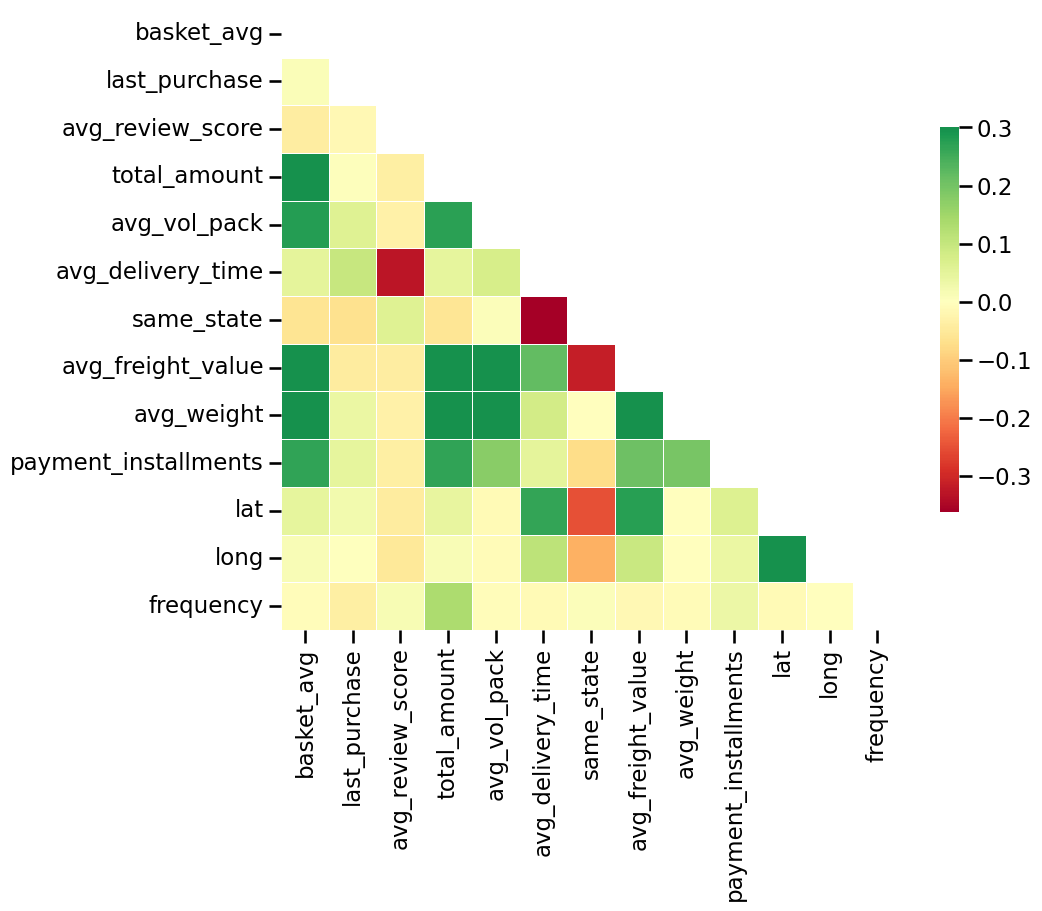

In [67]:
# Heatmap des corrélations entre les variables

fig, ax = plt.subplots(figsize=(10,10))

corr = customer.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap='RdYlGn'

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [68]:
# g = sns.PairGrid(customer)
# g.map(sns.scatterplot)

## Preparation

In [69]:
customer['same_state'] = customer.same_state.astype('category')

In [70]:
customer = customer.dropna()

In [71]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93274 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   basket_avg            93274 non-null  float64 
 1   last_purchase         93274 non-null  int64   
 2   avg_review_score      93274 non-null  float64 
 3   total_amount          93274 non-null  float64 
 4   avg_vol_pack          93274 non-null  float64 
 5   payment_type          93274 non-null  object  
 6   avg_delivery_time     93274 non-null  float64 
 7   same_state            93274 non-null  category
 8   avg_freight_value     93274 non-null  float64 
 9   avg_weight            93274 non-null  float64 
 10  payment_installments  93274 non-null  float64 
 11  lat                   93274 non-null  float64 
 12  long                  93274 non-null  float64 
 13  frequency             93274 non-null  int64   
 14  c

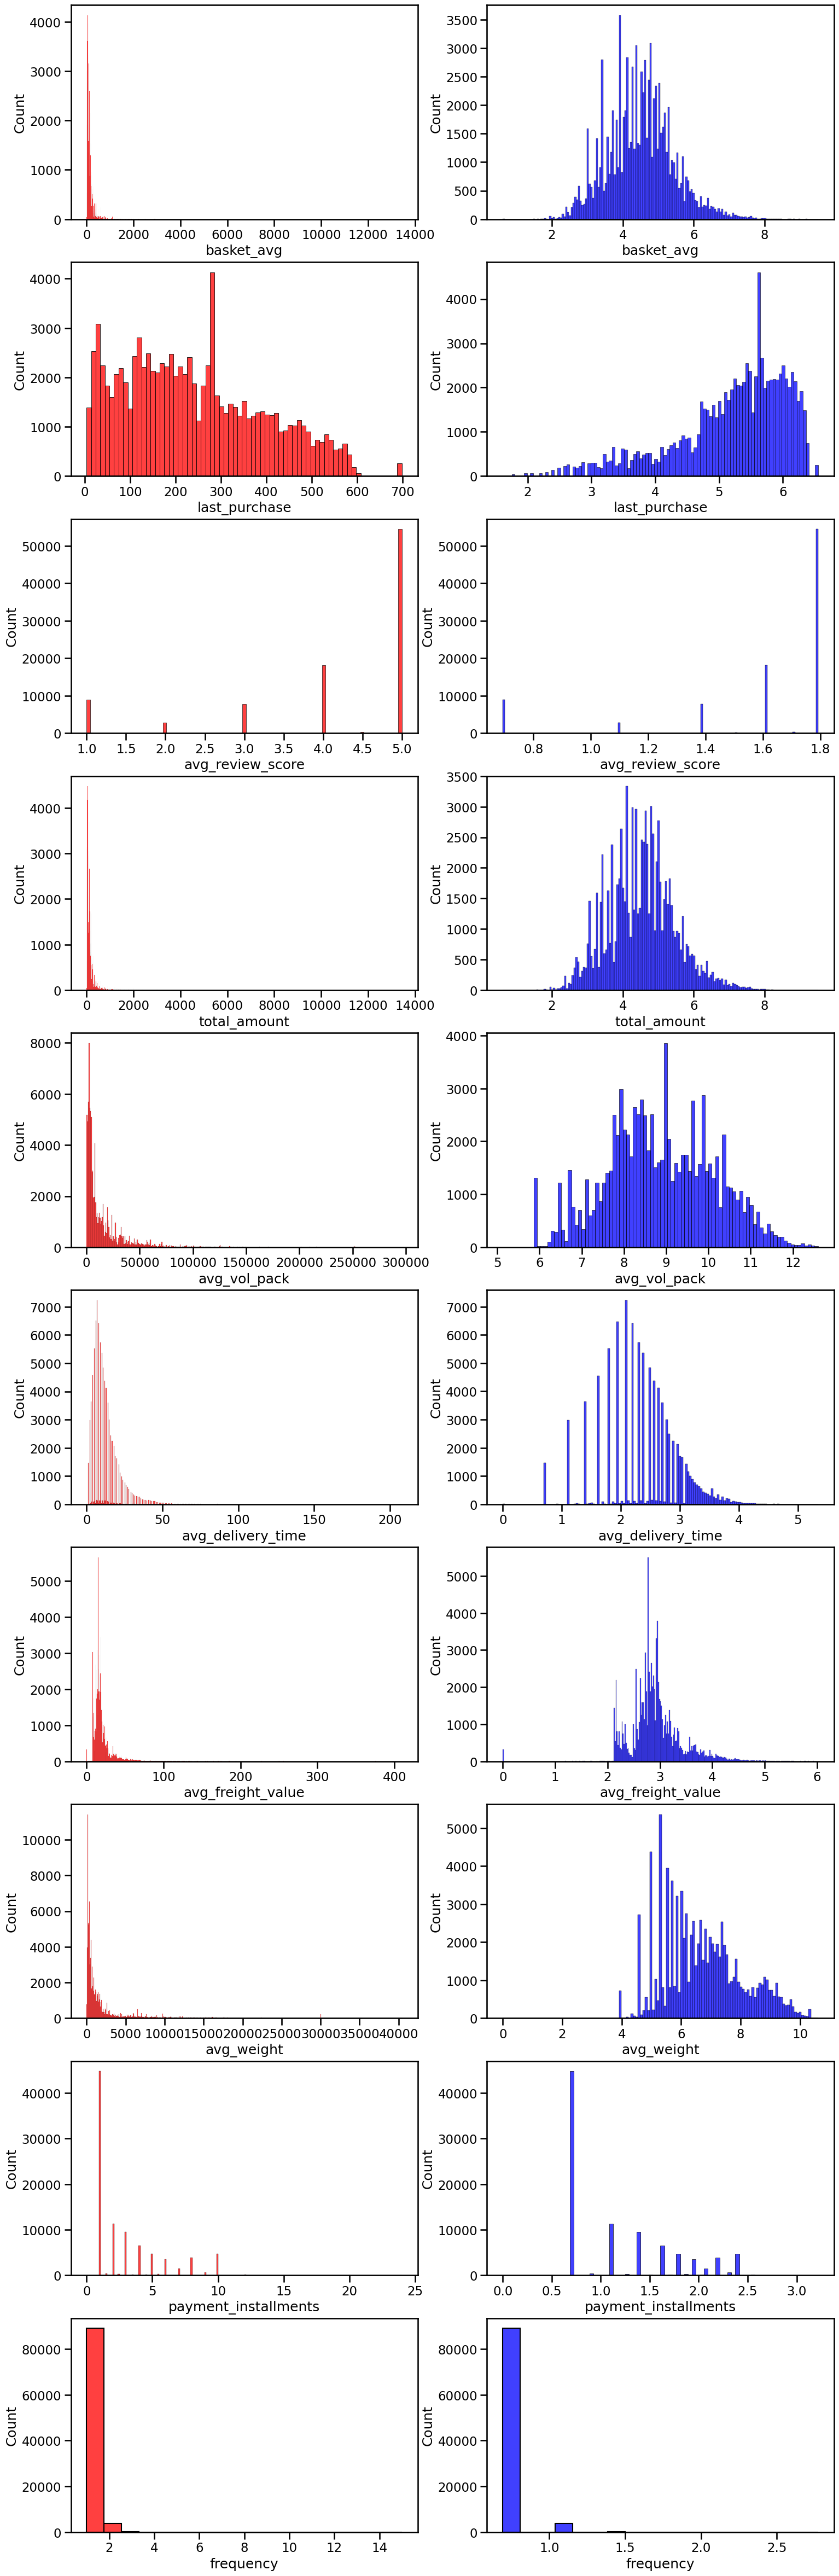

In [72]:
# Histogramme des variables numériques avec et sans transformation en log x+1

num = list(customer.select_dtypes(['float', 'int']).columns)
cat = list(customer.select_dtypes(['object', 'category']).columns)

num.remove('lat')
num.remove('long')

temp = np.log1p(customer[num])

length = len(num)

fig, ax = plt.subplots(length,2, figsize=(18,length*6))

for x in range(0, length*2):
    if x < length:
        sns.histplot(data=customer, x=num[x], ax=ax[x ,0], color='red')
    else :
        sns.histplot(data=temp, x=num[x-length ], ax=ax[x-length, 1], color='blue')
        
plt.show()

# Export

In [73]:
# Export des données vers un fichier CSV
customer.to_csv('customer.csv')